# IMAGE TO WAV TRANSFORMATION

In [1]:
import pandas as pd       # library to read data from csv file or excel file
import numpy as np
import matplotlib.pyplot as plt   # library to plot graphs or create visuals for analysis
import seaborn as sns
import wave
import struct
from PIL import Image
import os

# IMAGE TO AUDIO TRANSFORMATION

In [3]:


def image_to_wav(image_path, output_wav_path):
    # Open the image and convert it to grayscale
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    height, width = img_array.shape

    sample_rate = 44100
    duration = 3.0
    frequency_scaling_factor = 1000

    num_frames = int(sample_rate * duration)
    num_channels = 1
    sampwidth = 2  # in bytes

    # Create the WAV file
    wav_file = wave.open(output_wav_path, 'w')
    wav_file.setparams((num_channels, sampwidth, sample_rate, num_frames, 'NONE', 'not compressed'))

    for i in range(num_frames):
        x = int(img_array[i % height, i % width])
        value = int(32767.0 * np.sin(x / frequency_scaling_factor))
        data = struct.pack('<h', value)
        wav_file.writeframesraw(data)

    wav_file.close()

# Parent folder containing weather category subfolders
input_parent_folder = r"C:\Users\phiri\Desktop\Data Science\Covid_19\train"

# Output folder for WAV files (matching the folder structure of the input)
output_parent_folder = r"C:\Users\phiri\Desktop\Data Science\Covid_19_sonified\train"

# Create the output parent folder if it doesn't exist
if not os.path.exists(output_parent_folder):
    os.makedirs(output_parent_folder)

# Loop through each subfolder in the parent folder
for subfolder in os.listdir(input_parent_folder):
    subfolder_path = os.path.join(input_parent_folder, subfolder)
    
    # Check if the subfolder path is a directory
    if os.path.isdir(subfolder_path):
        # Create a corresponding output subfolder
        output_subfolder_path = os.path.join(output_parent_folder, subfolder)
        if not os.path.exists(output_subfolder_path):
            os.makedirs(output_subfolder_path)
        
        # Iterate through image files in each subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(subfolder_path, filename)
                wav_filename = os.path.splitext(filename)[0] + '.wav'
                output_wav_path = os.path.join(output_subfolder_path, wav_filename)
                
                # Convert the image to WAV
                image_to_wav(image_path, output_wav_path)
                print(f"Converted {filename} in {subfolder} to {wav_filename}")



Converted COVID19(0).jpg in COVID19 to COVID19(0).wav
Converted COVID19(1).jpg in COVID19 to COVID19(1).wav
Converted COVID19(10).jpg in COVID19 to COVID19(10).wav
Converted COVID19(100).jpg in COVID19 to COVID19(100).wav
Converted COVID19(101).jpg in COVID19 to COVID19(101).wav
Converted COVID19(102).jpg in COVID19 to COVID19(102).wav
Converted COVID19(103).jpg in COVID19 to COVID19(103).wav
Converted COVID19(104).jpg in COVID19 to COVID19(104).wav
Converted COVID19(105).jpg in COVID19 to COVID19(105).wav
Converted COVID19(106).jpg in COVID19 to COVID19(106).wav
Converted COVID19(107).jpg in COVID19 to COVID19(107).wav
Converted COVID19(108).jpg in COVID19 to COVID19(108).wav
Converted COVID19(109).jpg in COVID19 to COVID19(109).wav
Converted COVID19(11).jpg in COVID19 to COVID19(11).wav
Converted COVID19(110).jpg in COVID19 to COVID19(110).wav
Converted COVID19(111).jpg in COVID19 to COVID19(111).wav
Converted COVID19(112).jpg in COVID19 to COVID19(112).wav
Converted COVID19(113).jpg

# AUDIO FEATURE EXTRACTION

In [4]:
import librosa
import pandas as pd
import numpy as np
import os

# Main folder path containing subfolders for different weather types
main_folder_path = r"C:\Users\phiri\Desktop\Data Science\Covid_19_sonified\data"

# Initialize an empty list to store features
features_h = []

# Feature extraction function
def feature_extractor(folder_path, label):
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".wav"):
            # Load the audio file
            file_path = os.path.join(folder_path, file_name)
            signal_audio_data, sample_rate = librosa.load(file_path)

            # Extract features
            mfccs = librosa.feature.mfcc(y=signal_audio_data, sr=sample_rate, n_mfcc=40)
            spectral_cent = librosa.feature.spectral_centroid(y=signal_audio_data, sr=sample_rate)
            spectral_cont = librosa.feature.spectral_contrast(y=signal_audio_data, sr=sample_rate, hop_length=256)
            zcr = librosa.feature.zero_crossing_rate(y=signal_audio_data, frame_length=512)
            chroma_stft = librosa.feature.chroma_stft(y=signal_audio_data, sr=sample_rate)
            rmse = librosa.feature.rms(y=signal_audio_data)
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=signal_audio_data, sr=sample_rate)
            spectral_rolloff = librosa.feature.spectral_rolloff(y=signal_audio_data, sr=sample_rate)

            # Scale features by taking the mean along the time axis
            Scaled_mfcc = np.mean(mfccs.T, axis=0)
            Scaled_spectral_cent = np.mean(spectral_cent.T, axis=0)
            Scaled_spectral_cont = np.mean(spectral_cont.T, axis=0)
            Scaled_zcr = np.mean(zcr.T, axis=0)
            Scaled_chroma_stft = np.mean(chroma_stft.T, axis=0)
            Scaled_rmse = np.mean(rmse.T, axis=0)
            Scaled_spectral_bandwidth = np.mean(spectral_bandwidth.T, axis=0)
            Scaled_spectral_rolloff = np.mean(spectral_rolloff.T, axis=0)

            # Append the extracted features to the list
            features_h.append([file_name, Scaled_mfcc, Scaled_zcr, Scaled_spectral_cent, Scaled_spectral_cont,
                               Scaled_chroma_stft, Scaled_rmse, Scaled_spectral_bandwidth, 
                               Scaled_spectral_rolloff, label])

# Folder names for different weather types
folders = ['COVID19', 'NORMAL','PNEUMONIA']

# Iterate over each folder and extract features
for folder_name in folders:
    folder_path = os.path.join(main_folder_path, folder_name)
    if os.path.exists(folder_path):
        label = folder_name
        feature_extractor(folder_path, label)

# Convert the features list into a DataFrame
df = pd.DataFrame(features_h, columns=['filename', 'MFCC', 'Z_C_R', 'Spectral_cent', 'Spectral_cont', 
                                       'Chroma_STFT', 'RMSE', 'Spectral_Bandwidth', 
                                       'Spectral_Rolloff', 'class'])





C:\Users\phiri\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [5]:
df.head()

,filename,MFCC,Z_C_R,Spectral_cent,Spectral_cont,Chroma_STFT,RMSE,Spectral_Bandwidth,Spectral_Rolloff,class
0,COVID19(0).wav,"[-211.2203, 91.58101, 14.053969, 18.94222, 7.1...",[0.0],[1396.9680317757047],"[24.53466541582145, 9.960143027965927, 10.7921...","[0.95549095, 0.99386936, 0.8893089, 0.77209777...",[0.15255344],[2483.380927299762],[3641.5131084735576],COVID19
1,COVID19(1).wav,"[-253.06166, 103.9488, 24.654137, 28.811594, 1...",[0.0011418269230769231],[840.9530819008096],"[21.767738116646242, 9.705429577213863, 11.599...","[0.84193987, 0.86737716, 0.89652145, 0.8840982...",[0.19112784],[1999.6552383947],[1406.1181640625],COVID19
2,COVID19(10).wav,"[-166.42487, 94.29074, 0.70898604, 33.55166, 1...",[0.05372596153846154],[1550.0901365291822],"[29.210815142577506, 16.2185888887809, 15.3448...","[0.68911856, 0.45344728, 0.5082019, 0.5851065,...",[0.15478034],[2429.0686005537805],[3774.853327824519],COVID19
3,COVID19(100).wav,"[-209.72913, 113.99504, 16.785994, 30.09248, 1...",[0.0014723557692307692],[1048.9265637321662],"[19.267371502409656, 10.35561630433968, 12.393...","[0.6667313, 0.68499327, 0.70917904, 0.6984017,...",[0.14822333],[2098.2939048441726],[2316.227276141827],COVID19
4,COVID19(101).wav,"[-188.23221, 112.38452, 11.555635, 30.547922, ...",[0.038671875],[1185.9396629876578],"[19.698528958894645, 10.097224053080932, 12.05...","[0.7984803, 0.83110684, 0.83213884, 0.77888274...",[0.15440364],[2170.6920693025418],[2829.048790564904],COVID19


In [7]:
df.to_csv(r"C:\Users\phiri\Desktop\Data Science\Covid_19_sonified\data\covidsonified.csv", index = False)

In [9]:
df.to_excel(r"C:\Users\phiri\Desktop\Data Science\Covid_19_sonified\data\covidsonified.xlsx", index = False)

# LOAD DATA

In [2]:
data_df = pd.read_excel(r"C:\Users\phiri\Desktop\Data Science\Covid_19_sonified\data\covidsonified.xlsx")

In [3]:
data_df.head()

,filename,MFCC,Z_C_R,Spectral_cent,Spectral_cont,Chroma_STFT,RMSE,Spectral_Bandwidth,Spectral_Rolloff,class
0,COVID19(0).wav,[-2.1122031e+02 9.1581009e+01 1.4053969e+01 ...,[0.],[1396.96803178],[24.53466542 9.96014303 10.79213715 13.018839...,[0.95549095 0.99386936 0.8893089 0.77209777 0...,[0.15255344],[2483.3809273],[3641.51310847],COVID19
1,COVID19(1).wav,[-2.5306166e+02 1.0394880e+02 2.4654137e+01 ...,[0.00114183],[840.9530819],[21.76773812 9.70542958 11.5992995 12.082898...,[0.84193987 0.86737716 0.89652145 0.88409823 0...,[0.19112784],[1999.65523839],[1406.11816406],COVID19
2,COVID19(10).wav,[-166.42487 94.29074 0.70898604 3...,[0.05372596],[1550.09013653],[29.21081514 16.21858889 15.34480792 15.208780...,[0.68911856 0.45344728 0.5082019 0.5851065 0...,[0.15478034],[2429.06860055],[3774.85332782],COVID19
3,COVID19(100).wav,[-2.0972913e+02 1.1399504e+02 1.6785994e+01 ...,[0.00147236],[1048.92656373],[19.2673715 10.3556163 12.3933345 12.673755...,[0.6667313 0.68499327 0.70917904 0.6984017 0...,[0.14822333],[2098.29390484],[2316.22727614],COVID19
4,COVID19(101).wav,[-188.23221 112.38452 11.555635 3...,[0.03867188],[1185.93966299],[19.69852896 10.09722405 12.05617163 12.279531...,[0.7984803 0.83110684 0.83213884 0.77888274 0...,[0.15440364],[2170.6920693],[2829.04879056],COVID19


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6432 entries, 0 to 6431
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   filename            6432 non-null   object
 1   MFCC                6432 non-null   object
 2   Z_C_R               6432 non-null   object
 3   Spectral_cent       6432 non-null   object
 4   Spectral_cont       6432 non-null   object
 5   Chroma_STFT         6432 non-null   object
 6   RMSE                6432 non-null   object
 7   Spectral_Bandwidth  6432 non-null   object
 8   Spectral_Rolloff    6432 non-null   object
 9   class               6432 non-null   object
dtypes: object(10)
memory usage: 502.6+ KB


In [6]:
data_df.describe()

,filename,MFCC,Z_C_R,Spectral_cent,Spectral_cont,Chroma_STFT,RMSE,Spectral_Bandwidth,Spectral_Rolloff,class
count,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432
unique,6432,6397,3326,6397,6397,6397,6390,6397,5660,3
top,COVID19(0).wav,[-1.6667015e+02 1.1792050e+02 1.4612006e+01 ...,[0.],[1393.46242732],[20.23507617 9.82432079 13.14065759 13.535584...,[0.6469766 0.57631457 0.69957465 0.6985296 0...,[0.12284862],[2274.06053221],[2459.42307692],PNEUMONIA
freq,1,3,488,3,3,3,3,3,6,4273


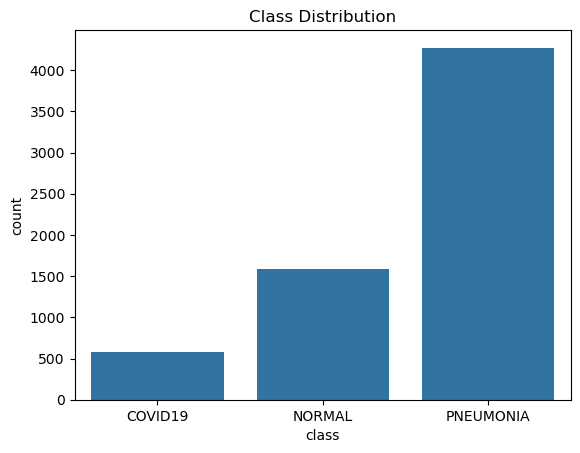

<Figure size 640x480 with 0 Axes>

In [9]:
## Lets create a visual of the distribution of classes
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=data_df)
plt.title('Class Distribution')
plt.show()
plt.savefig('class_distribution.png')

# LOAD FEATURES

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import ast

combined_features = []

for index, row in data_df.iterrows():
    features = []

    # Convert the string representations of arrays back to numerical arrays
    mfcc = np.fromstring(row['MFCC'].strip('[]'), sep=' ')
    zcr = np.fromstring(row['Z_C_R'].strip('[]'), sep=' ')
    spectral_cent = np.fromstring(row['Spectral_cent'].strip('[]'), sep=' ')
    spectral_cont = np.fromstring(row['Spectral_cont'].strip('[]'), sep=' ')
    spectral_rolloff = np.fromstring(row['Spectral_Rolloff'].strip('[]'), sep=' ')
    rmse = np.fromstring(row['RMSE'].strip('[]'), sep=' ')
    chroma_stft = np.fromstring(row['Chroma_STFT'].strip('[]'), sep=' ')
    spectral_bandwidth = np.fromstring(row['Spectral_Bandwidth'].strip('[]'), sep=' ')

    # Add features to list we created
    features.extend(mfcc)
    features.append(zcr[0])
    features.append(spectral_cent[0])
    features.extend(spectral_cont)
    features.extend(spectral_rolloff)
    features.extend(rmse)
    features.extend(chroma_stft)
    features.extend(spectral_bandwidth)

    combined_features.append(features)

X = np.array(combined_features)

print(X.shape)

# Encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_df['class'])
print(y)

(6432, 64)
[0 0 0 ... 2 2 2]


# TRAIN TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
unique_classes = np.unique(y_test)
print(unique_classes)

[0 1 2]


# MODEL TRAINING AND TESTING

Classifier: Random Forest
Accuracy: 0.8632
Classification Report:
               precision    recall  f1-score   support

     COVID19     0.8974    0.6087    0.7254       115
      NORMAL     0.8566    0.7350    0.7912       317
   PNEUMONIA     0.8623    0.9450    0.9018       855

    accuracy                         0.8632      1287
   macro avg     0.8721    0.7629    0.8061      1287
weighted avg     0.8641    0.8632    0.8588      1287

Training Time: 16.3533 seconds
Testing Time: 0.0460 seconds
ROC AUC: 0.9534
Classifier: Decision Tree
Accuracy: 0.7894
Classification Report:
               precision    recall  f1-score   support

     COVID19     0.5922    0.5304    0.5596       115
      NORMAL     0.6994    0.7192    0.7092       317
   PNEUMONIA     0.8473    0.8503    0.8488       855

    accuracy                         0.7894      1287
   macro avg     0.7130    0.7000    0.7059      1287
weighted avg     0.7881    0.7894    0.7886      1287

Training Time: 0.2881 second

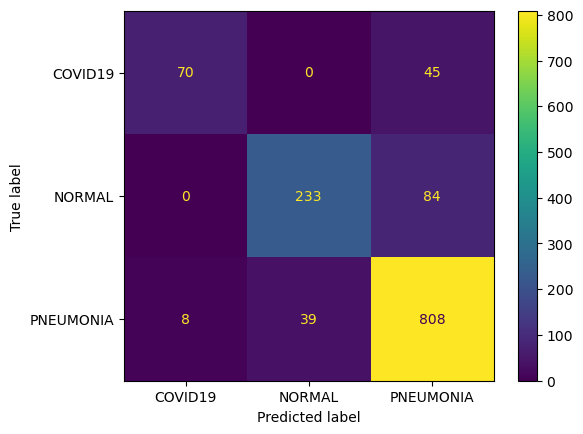

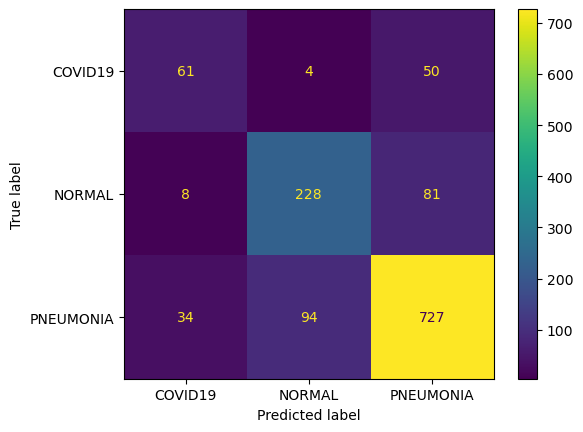

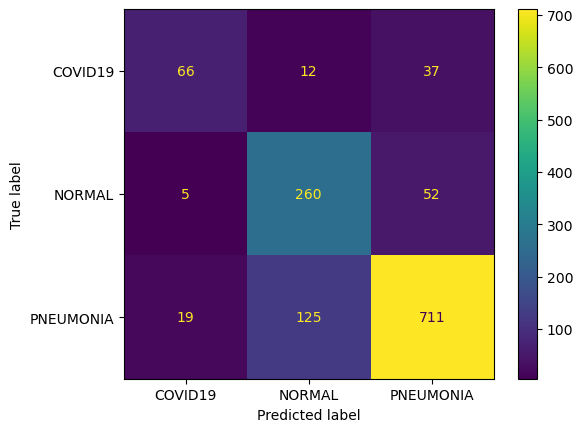

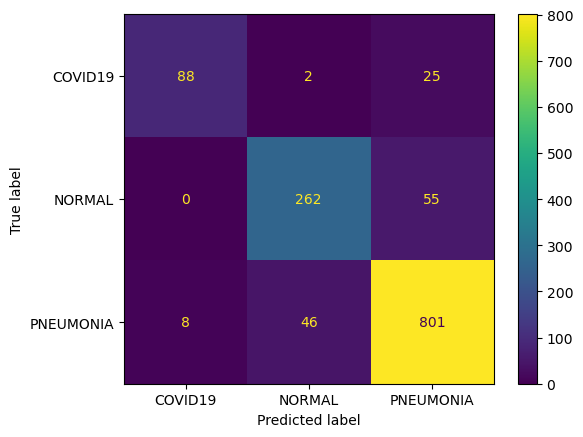

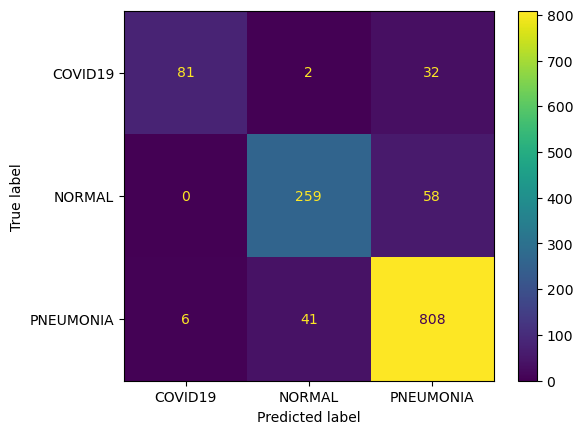

In [15]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier

import time


# Define a function to train and evaluate a classifier
def train_classifier(classifier, X_train_selected, y_train, X_test_selected, y_test, name):
    # Record start time for training
    start_time = time.perf_counter()

    # Train the model
    classifier.fit(X_train_selected, y_train)

    # Record end time for training
    end_time = time.perf_counter()

    # Calculate training time
    training_time = end_time - start_time

    # Record start time for testing
    start_time = time.perf_counter()

    # Make predictions
    predictions = classifier.predict(X_test_selected)

    # Record end time for testing
    end_time = time.perf_counter()

    # Calculate testing time
    testing_time = end_time - start_time

    # Inverse transform of the encoded labels back to their original names
    predicted_labels = label_encoder.inverse_transform(predictions)
    actual_labels = label_encoder.inverse_transform(y_test)

    # Model Evaluation
    accuracy = accuracy_score(actual_labels, predicted_labels)
    classification_rep = classification_report(actual_labels, predicted_labels, digits=4)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_rep)
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Testing Time: {testing_time:.4f} seconds")

    # Compute and display the confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(actual_labels))
    disp.plot(cmap='viridis')

    #  ROC AUC score calculation
    roc_auc = roc_auc_score(label_encoder.transform(actual_labels), classifier.predict_proba(X_test_selected), multi_class='ovr')
    print(f"ROC AUC: {roc_auc:.4f}")

# Initialize the classifiers
rf_classifier = RandomForestClassifier(bootstrap= False, max_depth= 54, min_samples_split= 3, n_estimators=353,random_state =42)
dt_classifier = DecisionTreeClassifier(max_depth= 12, min_samples_split= 5, random_state=42)
knn_classifier = KNeighborsClassifier(leaf_size= 201, n_neighbors= 2, p=2, weights= 'distance')
lgbm_classifier = LGBMClassifier(max_depth= 50, min_child_samples= 63, n_estimators= 610, num_leaves= 189)
xgb_classifier = XGBClassifier()



# Train and evaluate each classifier
train_classifier(rf_classifier, X_train, y_train, X_test, y_test, 'Random Forest')
train_classifier(dt_classifier, X_train, y_train, X_test, y_test, 'Decision Tree')
train_classifier(knn_classifier, X_train, y_train, X_test, y_test, 'KNN')
train_classifier(lgbm_classifier, X_train, y_train, X_test, y_test, 'LGBM')
train_classifier(xgb_classifier, X_train, y_train, X_test, y_test, 'XBOOST')

# ROC AUC PLOTS

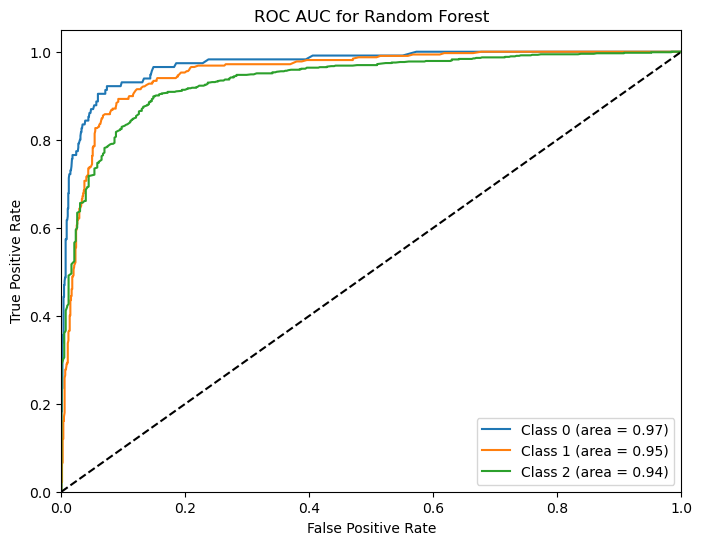

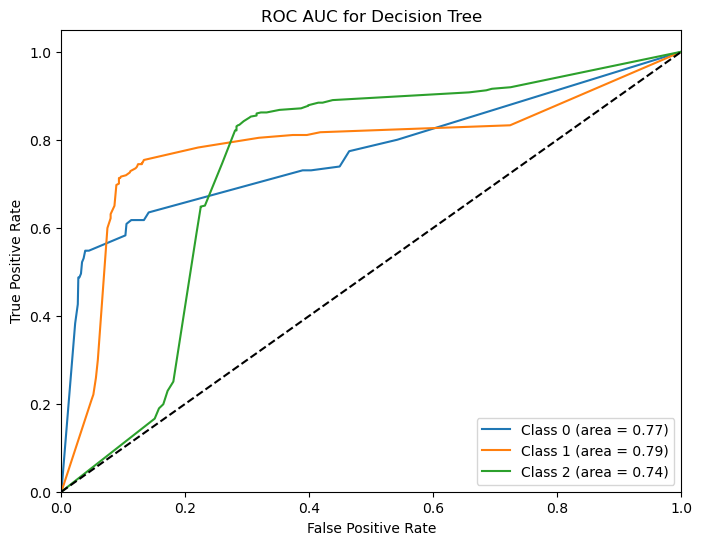

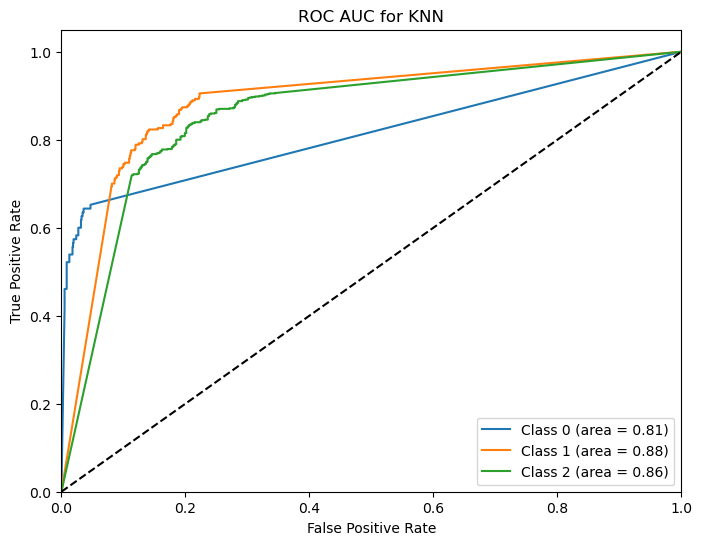

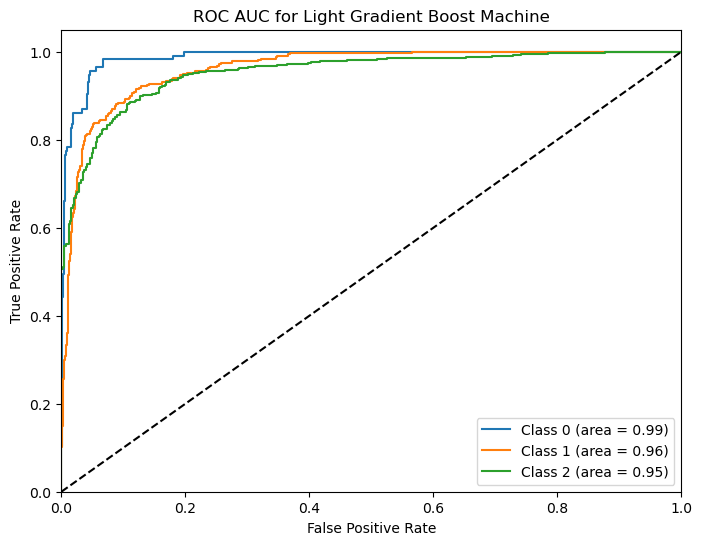

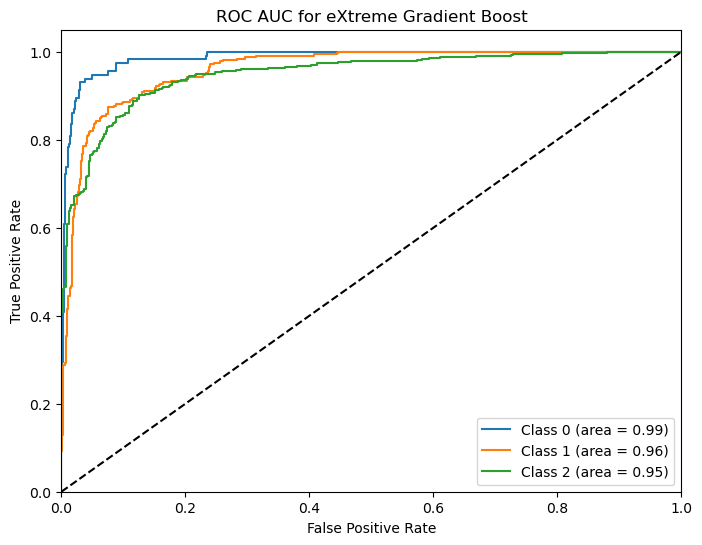

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define a function to compute and plot ROC AUC
def plot_roc_auc(classifier, X_test, y_test, name):
    if hasattr(classifier, 'predict_proba'):
        y_scores = classifier.predict_proba(X_test)
        n_classes = y_scores.shape[1]
    else:
        y_scores = classifier.decision_function(X_test)
        n_classes = 1

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC for {name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC AUC for Random Forest
plot_roc_auc(rf_classifier, X_test, y_test, 'Random Forest')

# Plot ROC AUC for Decision Tree
plot_roc_auc(dt_classifier, X_test, y_test, 'Decision Tree')

# Plot ROC AUC for KNN
plot_roc_auc(knn_classifier, X_test, y_test, 'KNN')
plot_roc_auc(lgbm_classifier, X_test, y_test, 'Light Gradient Boost Machine')
plot_roc_auc(xgb_classifier, X_test, y_test, 'eXtreme Gradient Boost')